# Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
filepath = "AustinProperties.csv"

In [3]:
df = pd.read_csv(filepath)

In [4]:
df.columns

Index(['Address', 'Zip Code', 'Sub-Market', 'Bed', 'Bath', 'Avg SF', '# Units',
       'Mix %', 'Units Available - Units', 'Units Available - Percent',
       'Avg Asking Rent/Unit', 'Avg Asking Rent/SF', 'Avg Effective Rent/Unit',
       'Avg Effective Rent/SF', 'Concessions - %', 'Year Built',
       'Year Renovated', 'Units', 'Lande (Acres)', 'Vacancy %',
       'Miles from Domain', 'Miles fom Downtown', 'Washer/Dryer',
       'Wak in Closet', 'Hardwood/Vinyl Floor', 'Balcony', 'Walk Score',
       'Transit Score'],
      dtype='object')

In [5]:
austin_properties = df.loc[:, ['Bed', 'Bath', 'Avg SF', 'Year Built', 
                               'Year Renovated', 'Vacancy %', 'Washer/Dryer',
                                'Wak in Closet', 'Hardwood/Vinyl Floor', 'Balcony',
                                'Walk Score', 'Transit Score']]

In [13]:
X = austin_properties
y = df['Avg Asking Rent/Unit']

# Splitting the data into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(138, 12)
(35, 12)
(138,)
(35,)


# Training and testing the model - LinearRegression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Model Evaluation - R Square

In [22]:
y_test_predicted = lin_model.predict(X_test)

In [25]:
mse_test = mean_squared_error(y_test, y_test_predicted)
r2_test = r2_score(y_test, y_test_predicted)

In [26]:
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"R-quared (R2): {r2_test}")

Mean Squared Error (MSE): 11934.282253280597
R-quared (R2): 0.8733945142369772


In [29]:
lin_model.score(X, y)

0.8067546569993913

# Residuals

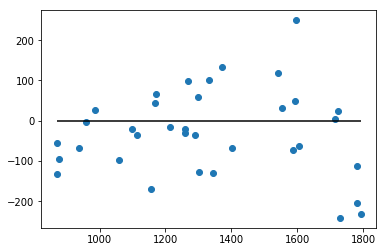

In [31]:
plt.scatter(y_test_predicted, y_test_predicted-y_test)
plt.hlines(y=0, xmin=y_test_predicted.min(), xmax=y_test_predicted.max())
plt.show()

In [33]:
df_encoded = pd.get_dummies(df, columns=["Zip Code", "Sub-Market"])

In [34]:
df_encoded

,Address,Bed,Bath,Avg SF,# Units,Mix %,Units Available - Units,Units Available - Percent,Avg Asking Rent/Unit,Avg Asking Rent/SF,...,Washer/Dryer,Wak in Closet,Hardwood/Vinyl Floor,Balcony,Walk Score,Transit Score,Zip Code_78610,Zip Code_78613,Sub-Market_Buda-Kyle MF,Sub-Market_Ceadar Park MF
0,1250 Robert S Light Dr - Trails at Buda Ranch,1,1,597,48,0.182,3,0.063,973,1.63,...,2,1,1,1,8,0,1,0,1,0
1,1250 Robert S Light Dr - Trails at Buda Ranch,1,1,735,48,0.182,3,0.063,963,1.31,...,2,1,1,1,8,0,1,0,1,0
2,1250 Robert S Light Dr - Trails at Buda Ranch,2,2,960,120,0.455,3,0.025,1108,1.15,...,2,1,1,1,8,0,1,0,1,0
3,1250 Robert S Light Dr - Trails at Buda Ranch,3,2,1150,48,0.182,3,0.063,1276,1.11,...,2,1,1,1,8,0,1,0,1,0
4,5500 Overpass Rd - Tuscany Park at Buda,1,1,660,56,0.318,2,0.036,859,1.30,...,1,1,1,1,17,0,1,0,1,0
5,5500 Overpass Rd - Tuscany Park at Buda,2,1,910,32,0.182,1,0.031,1028,1.13,...,1,1,1,1,17,0,1,0,1,0
6,5500 Overpass Rd - Tuscany Park at Buda,2,2,957,34,0.193,1,0.029,1023,1.07,...,1,1,1,1,17,0,1,0,1,0
7,5500 Overpass Rd - Tuscany Park at Buda,2,2,982,30,0.170,1,0.033,1023,1.04,...,1,1,1,1,17,0,1,0,1,0
8,5500 Overpass Rd - Tuscany Park at Buda,3,2,1158,24,0.136,1,0.042,1173,1.01,...,1,1,1,1,17,0,1,0,1,0
9,1165 Fire Cracker Dr - Springs at Sunfield,0,1,525,13,0.061,10,0.769,951,1.81,...,2,1,1,1,12,0,1,0,1,0
